# TP 5 & 6 Systèmes non linéaires
## Exercice 1 : Vitesse de convergence
### Question 2

In [14]:
import math
import scipy.linalg
import scipy.stats as spi
import matplotlib.pyplot as plt
import numpy as np


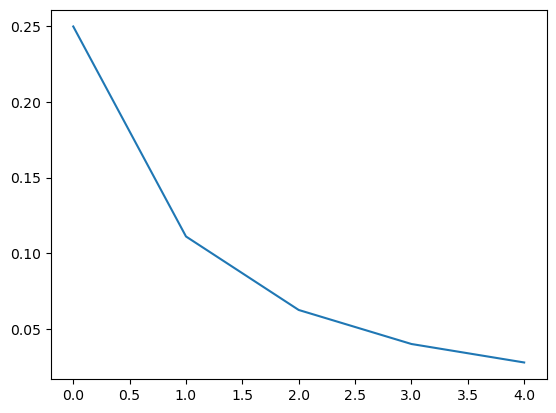

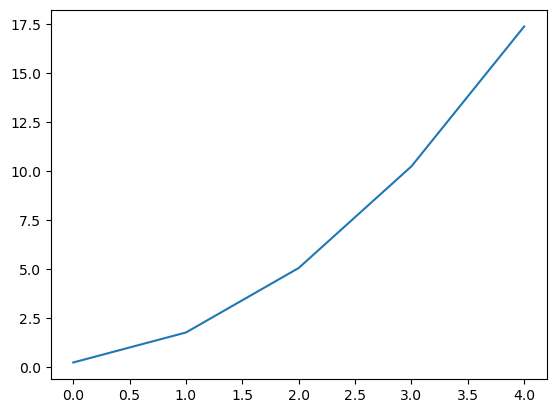

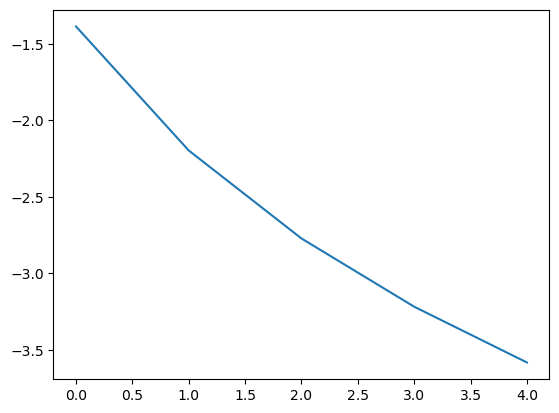

In [24]:
#Calcul les k premiers termes de la suite 
def x1(k):
    x = np.zeros(k)
    for i in range(k):
        x[i] = 1/ (i+1)**2
    return x #un tableau de taille k

def x2(k):
    x = np.zeros(k)
    for i in range(k):
        x[i] = (1 / 2)**i    
    return x

def x3(k):
    x = np.zeros(k)
    x[0] = 1/2
    for i in range (k-1):
        x[i+1] = x[i]**2
    return x
    



def dessine (z, k, p):
    x = z(k) #x de taille k # z est une fonction    
    y = x[1:]/x[:1]  #xk+1/xk
    kk = np.arange(k-1)
    plt.plot(kk,y)
    plt.show()
    if p != 1 :
        z = x[1:] / x[:-1]**p  #xk+1/xk**p  #z de taille k-1  0 ...k-2
        
        plt.plot(kk,z)
        plt.show()
    return kk,x,y,z
kk,x,y,z = dessine(x1, 6, 2)


def trace (z, k, p):
    x = z(k) #x de taille k    
    y = np.log(x[:-1])  #ln(xk)
    l = np.log(x[1:])  #ln(xk+1)  
    kk = np.arange(k-1)
    plt.plot(kk,l)
    plt.show()
    return kk,x,l,z
kk, x, l, z = trace(x1, 6, 2)





# Système monodimensionnels

## Exercice 2 : Méthode de Newton pour les polynomes
### Question 1


(-2.893289196304623, 29, array([2.19213537e+00, 3.08115816e+00, 3.39305506e+00, 1.91250647e+00,
       6.64184931e+03, 1.96593670e+03, 5.81403709e+02, 1.71781665e+02,
       5.08122482e+01, 1.52319744e+01, 4.88231623e+00, 2.09532324e+00,
       3.63833963e+00, 5.70111021e+00, 2.27533846e+00, 2.76335472e+00,
       3.52619674e+00, 1.91178998e+00, 2.12817627e+04, 6.30081785e+03,
       1.86338614e+03, 5.49502282e+02, 1.60812437e+02, 4.60616673e+01,
       1.23779720e+01, 2.72710256e+00, 3.24459335e-01, 7.20425506e-03,
       3.84006635e-06, 1.09556808e-12]))
(-4.494568576368131e-20, 3, array([1.32539625e-01, 5.20521161e-03, 2.82108241e-07, 4.49456858e-20]))
(-1.2510786215851584, 28, array([5.74567156e-01, 3.74147092e-01, 5.40378693e-01, 3.89557100e-01,
       4.74246607e-01, 4.48718486e-01, 3.66598418e-01, 1.06096162e+00,
       4.03189696e-01, 4.35338541e-01, 5.25132399e-01, 3.28922701e-01,
       7.83847922e+00, 2.33263218e+00, 7.46541064e-01, 3.36637100e-01,
       1.01243495e+00, 1.3

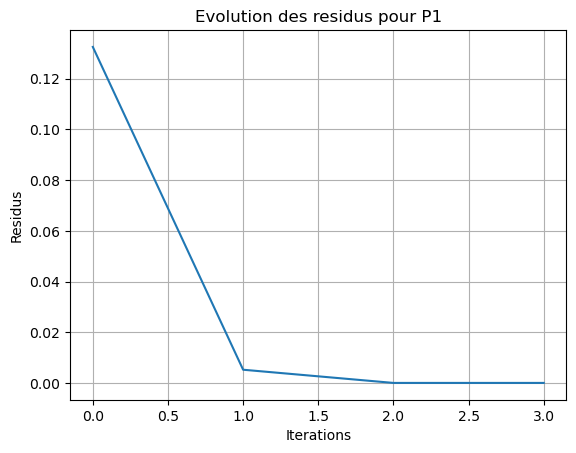

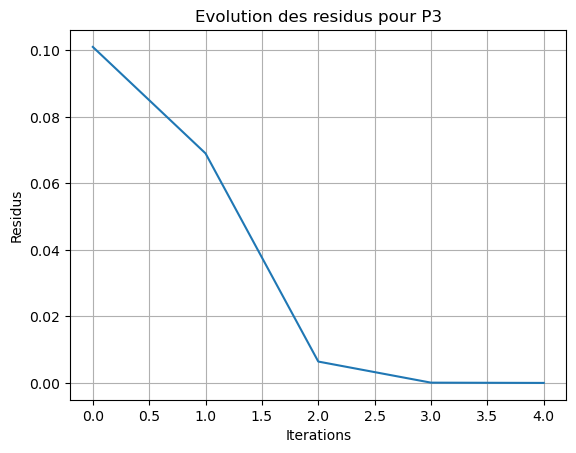

In [56]:
def polynome(x,a,b,c):
    return x**3+c*x**2+b*x+a
    
def derive(x,a,b,c):
    return 3*x**2+2*c*x+b
    
def newton (a,b,c, x0, n_iter_max=100, tol=1e-7):
    
    """
    Implémente la méthode de Newton pour trouver les racines d'un polynome p(x) = x³ + cx² + bx + a.

    Args :
        a, b, c : Les coefficients du polynome p(x) = x³ + cx² + bx + a.
        x0 : valeur de départ.
        n_iter_max : nombre maximum d'itérations (par défaut 100).
        tol : tolérance de convergence (par défaut 1e-7).

    Retour:
        Un tuple contenant :
            - La solution (un tableau numpy représentant la racine).
            - Le nombre d'itérations effectuées.
            - Un tableau contenant la valeur absolue du polynome à chaque itération.
    """
    
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = abs(polynome(x0,a,b,c))
    x = x0
    
    while (n_iter < n_iter_max) and res[n_iter] > tol:
        n_iter += 1
        x = x - polynome(x,a,b,c) / derive(x,a,b,c)
        res[n_iter] = abs(polynome(x,a,b,c))
        
    return (x, n_iter, res[:n_iter+1])

#Exemples d'applications
x0 = 0.135
#x0 = 0
#x0 = 1
A = newton (2,1,3,x0)
print (A)

p1 = newton(0,-1,0,x0)
p2 = newton(math.sqrt(2)/2,-1,0,x0)
p3 = newton(0,1,-2,x0)

print (p1)
print (p2)
print (p3)


#Tracer l'évolution des résidus obtenus lors du calcul d'une racine de p1.
residus = p1[2]
plt.plot(residus)
plt.xlabel('Iterations')
plt.ylabel('Residus')
plt.title('Evolution des residus pour P1')
plt.grid(True)
plt.show()
#D'apres le graph une convergence quadratique est obtenue

#Tracer l'évolution des résidus obtenus lors du calcul d'une racine de p3.

residus3 = p3[2]
plt.plot(residus3)
plt.xlabel('Iterations')
plt.ylabel('Residus')
plt.title('Evolution des residus pour P3')
plt.grid(True)
plt.show()
#D'apres le graph une convergence linéaire est obtenue
#La raison de cette perte de vitesse de convergence est que la valeur initial a changé, en p3 nous avons x=1



## Systèmes multidimensionnels
### Exercice 4 : Newton pour un système 2 * 2

In [20]:
def newton(g, dg, x0, n_iter_max=100, tol=1e-7):
    """
    Implémente la méthode de Newton pour trouver les racines d'un système d'équations.

    Args :
        g : Une fonction représentant le système d'équations (prend deux arguments).
        dg : Une fonction représentant la dérivée (jacobienne) de g (prend deux arguments).
        x0 : une estimation initiale de la racine (un tuple ou un tableau numpy avec deux éléments).
        n_iter_max : nombre maximum d'itérations (par défaut 100).
        tol : tolérance de convergence (par défaut 1e-7).

    Retour:
        Un tuple contenant :
            - La solution (un tableau numpy représentant la racine).
            - Le nombre d'itérations effectuées.
            - Un tableau contenant la norme de la fonction à chaque itération.
    """
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = np.linalg.norm(g(x0[0], x0[1]))
    x = np.array(x0, dtype=float)
    while (n_iter < n_iter_max) and (res[n_iter] > tol):
        n_iter += 1
        x = x - np.dot(np.linalg.inv(dg(x[0], x[1])), g(x[0], x[1]))
        res[n_iter] = np.linalg.norm(g(x[0], x[1]))
        
    return (x, n_iter, res)


# Définition de la fonction de g
def g(x, y):
    X = np.power(x,4) + np.multiply(np.multiply(2,np.power(x,3)),y) - np.multiply(15,np.power(x,2)) + np.multiply(np.power(x,2),np.power(y,2)) + np.multiply(np.multiply(2,x),y) + np.power(y,2)
    Y = np.power(y,4) + np.multiply(np.multiply(2,x),np.power(y,3))-  np.multiply(8,np.power(y,2)) + np.multiply(np.power(x,2),np.power(y,2)) + np.multiply(np.multiply(2,x),y) + np.power(y,2)
    return np.array([X, Y])

# Définition des dérivées partielles de g
def dg(x, y):
    A1 = np.multiply(4,np.power(x,3)) + np.multiply(6, np.multiply(np.power(x, 2), y)) - np.multiply(30,x) + np.multiply(np.multiply(2,x),np.power(y,2)) + np.multiply(2,y)                      
    A2 = np.multiply(2,np.power(x,3)) + np.multiply(np.multiply(2,np.power(x,2)),y) + np.multiply(2,x) + np.multiply(2,y)
    B1 = np.multiply(2,np.power(y,3)) + np.multiply(np.multiply(2,x),np.power(y,2)) + np.multiply(2,y) + np.multiply(2,x)
    B2 = np.multiply(4,np.power(y,3)) + np.multiply(np.multiply(6,x),np.power(y,2)) - np.multiply(16,y) + np.multiply(np.multiply(2,y),np.power(x,2)) + np.multiply(2,x)
    return np.array([
        [A1, A2],
        [B1, B2]
    ])
        
# Calcul de la solution du système
x0 = (1, 1)    
Solution = newton(g, dg, x0)
print(Solution)
    
# Affichage du nombre d'itérations
print("Nombre d'itérations :", Solution[1])


(array([0.7818707 , 1.68191988]), 12, array([8.06225775e+00, 2.71543413e+02, 8.11388696e+01, 2.30051230e+01,
       5.22311625e+00, 1.17470849e+00, 5.11736210e-01, 8.00698263e-03,
       7.36368422e-04, 4.43635801e-05, 2.66795633e-06, 1.60271832e-07,
       9.62862456e-09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 

### Exercice 2: qst 4 et 5

In [58]:
import numpy as np
import math

def polynome(x, coeffs):
    result = 0
    for i, coeff in enumerate(coeffs):
        result += coeff * x**i
    return result

def derive(x, coeffs):
    result = 0
    for i, coeff in enumerate(coeffs[1:]):
        result += (i + 1) * coeff * x**i
    return result

def newton(coeffs, x0, n_iter_max=100, tol=1e-7, residual_tol=1e-7):
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = abs(polynome(x0, coeffs))
    x = x0
    
    while (n_iter < n_iter_max) and (res[n_iter] > tol) and (abs(polynome(x, coeffs)) > residual_tol):
        n_iter += 1
        x = x - polynome(x, coeffs) / derive(x, coeffs)
        res[n_iter] = abs(polynome(x, coeffs))
        
    return (x, n_iter, res[:n_iter+1])

# Exemple d'application avec un polynôme de degré 3
coefficients = [2, 1, 3, 0]  
x0 = 0.135
solution, iterations, residuals = newton(coefficients, x0, residual_tol=1e-10)

print("Solution:", solution)
print("Nombre d'itérations:", iterations)

# Validation
print("Validation : f(solution) =", polynome(solution, coefficients))


IndexError: index 100 is out of bounds for axis 0 with size 100

### Exercice 3 : Point fixe et Newton 
#### Le but est de calculer la racine x = sqrt(3) de g(x) = x² - 3

In [73]:
def g(x):
    return np.power(x,2) - 3

def f(x):
    return x - g(x)

def fixed_point_iter(f,x0,n_iter_max = 100, tol = 1e-7):
    """
    Implémente la méthode de point fixe pour trouver l'itéré final de la fonction f.

    Args :
        f : Une fonction.
        x0 : valeur de départ.
        n_iter_max : nombre maximum d'itérations (par défaut 100).
        tol : tolérance de convergence (par défaut 1e-7).

    Retour:
        Un tuple contenant :
            - La solution (un tableau numpy représentant la racine).
            - Le nombre d'itérations effectuées.
            - Un tableau contenant la norme de la fonction à chaque itération.
    """
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = abs(f(x0) - x0)
    x = np.array(x0, dtype=float)
    while (n_iter < n_iter_max) and (res[-1] > tol):
        n_iter += 1
        x = f(x)
        res[n_iter] = abs(f(x) - x)
    return (x, n_iter, res)

#Application
x0 = 0.25
B = fixed_point_iter(f, x0)
print(B)

# Application pour différentes valeurs de x0
x0_values = [0.1, 0.5, 1.0, 2.0, 10.0]
for x0 in x0_values:
    A = fixed_point_iter(f, x0)
    print(f"x0 = {x0}, Solution = {A[0]}, Nombre d'itérations = {A[1]}")
    
def fixed_point_iter_relax(f,x0,n_iter_max = 100, tol = 1e-7):
    n_iter = 0
    res = np.zeros(n_iter_max)
    res[0] = abs(f(x0) - x0)
    x = np.array(x0, dtype=float)
    while (n_iter < n_iter_max) and (res[-1] > tol):
        n_iter += 1
        x = np.multiply(c,f(x)) + np.multiply((1-c),x) 
        res[n_iter] = abs(f(x) - x)
    return (x, n_iter, res)

(array(0.25), 0, array([2.9375, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.    ]))
x0 = 0.1, Solution = 0.1, Nombre d'itérations = 0
x0 = 0.5, Solution = 0.5, Nombre d'itéra